In [64]:
import pandas as pd
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager

In [65]:
# https://www.youtube.com/watch?v=_IV1qfSPPwI&ab_channel=Algovibes

In [66]:
# !pip install python-binance

In [67]:
# %run ./Binance_keys.ipynb (pour executer un script dehors pr garder les cle securisees)

In [68]:
api_key = 'YqtSwA9CkxTjBlx2f3NUnBTj7YwH8hj4OZq9USMb7YsRfH18UC3JFS39QL3JgxDy'
api_secret = 'Ru1Drz8zalkBeTRShKKk8YEGsaeRh6YZ0lukwBZpGxClWiIfGBjB5MLoKd4zlgqw'

In [69]:
client = Client(api_key,api_secret)

In [70]:
client.get_account()

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1634828408166,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00005800', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00172000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '0.19939182', 'locked'

In [71]:
#data steam with websocket not covered in this tuto 

In [72]:
# historical data (1min price data)
# pd.DataFrame(client.get_historical_klines("BTCUSDT", "1m", "30 m ago UTC"))
# pd.DataFrame(client.get_historical_klines("BTCUSDT", "1h", "3 days ago UTC"))
# signification : https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data
pd.DataFrame(client.get_historical_klines("BTCUSDT", "1h", "4 h ago UTC"))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1634817600000,64836.51000000,65220.00000000,64366.72000000,65060.14000000,2938.02513000,1634821199999,190411165.42006540,101517,1421.09455000,92107291.27997140,0
1,1634821200000,65060.15000000,65599.98000000,64681.26000000,64752.24000000,2238.42203000,1634824799999,146031488.80430420,71923,1109.85653000,72412433.66671680,0
2,1634824800000,64752.25000000,64900.00000000,62888.00000000,63648.66000000,6666.08438000,1634828399999,425817170.10182110,188689,2787.17243000,178047118.03994340,0
3,1634828400000,63648.65000000,63888.00000000,62000.00000000,62518.96000000,3823.11810000,1634831999999,240968297.13773770,118084,1616.71570000,102030127.52131200,0


In [73]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+" min ago UTC"))
    frame = frame.iloc[:,:6] # on s'arrête a la colonne 6 
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float) # transform string to floats :
    return frame    

In [90]:
test = getminutedata("DOGEUSDT","1h","1440")
test

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-20 16:00:00,0.2522,0.2567,0.2503,0.2563,102017435.0
2021-10-20 17:00:00,0.2563,0.2563,0.2515,0.2534,65396181.0
2021-10-20 18:00:00,0.2534,0.2559,0.2524,0.2547,74535255.0
2021-10-20 19:00:00,0.2547,0.2620,0.2543,0.2574,178698992.0
2021-10-20 20:00:00,0.2574,0.2600,0.2527,0.2559,116955084.0
2021-10-20 21:00:00,0.2559,0.2572,0.2540,0.2560,53689797.0
2021-10-20 22:00:00,0.2561,0.2566,0.2535,0.2538,54536569.0
2021-10-20 23:00:00,0.2538,0.2566,0.2521,0.2548,87171103.0
2021-10-21 00:00:00,0.2548,0.2557,0.2528,0.2550,53627891.0


<AxesSubplot:xlabel='Time'>

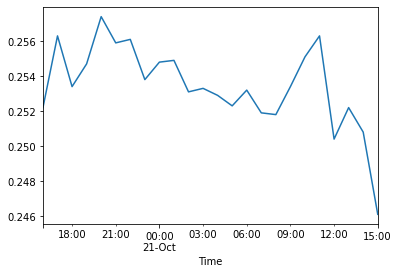

In [91]:
test.Open.plot()

In [28]:
# Trading strategy : (verry simple...)
# buy if the asset fell by more than .2 % within the last 30 min
# sell if assez rises by more than 0.15% (why 0.15% ? because of the tradign fees, everything below that will result a loss)
# or falls further by 0.15%
# there is a lot of optimization potential !!! (here can be my touch)

In [41]:
# Relative change : pct_change()
df = pd.DataFrame({'AU': [1, 2, 3 , 4 , 1]})
df
print(df.AU.pct_change())
# .cumprod()  : produit cumulatif : a,b,c = a, a.b, a.b.c
df = pd.DataFrame({'AU': [1, 2, 3 , 4 , 1]})
print(df.cumprod()) 

0         NaN
1    1.000000
2    0.500000
3    0.333333
4   -0.750000
Name: AU, dtype: float64
   AU
0   1
1   2
2   6
3  24
4  24


In [55]:
# Strategy test : not perfect not ready to use 

def strategytest(symbol, qty, entried = False) :    # this will buy and sell in the same function
    
    df = getminutedata(symbol,"1m","30m")
    # cumulative return (how the asset was performing over the last 30 min)
    cumulret = (df.Open.pct_change() + 1).cumprod() -1  # notion pas tres claire pour le moment mais pg avoncons, je regarde
                                                        # plustard usr tele
    # buy condition
    if not entried : # if i've not opened the trade yet
        if cumulret[-1] < -0.002 :
            order = client.create_order(symbol = symbol, side = 'BUY', 
                                        type = 'MARKET',  # u can also use a limit order (blast market) which is ofc better but 
                                                         # but I'm keeping as simple as possible here? (check the doc)
                                        quantity = qty)
            print(order) # to have infos sur l'order : buying price, time etc...
            # once the order is placed, i want to change the boolean to true
            enried=True
        else :
            print("No trade has been executed")
            
    # Selling condition : 
    if entried :
        while True :
            # I want to know how my asset has performed since i've bought it 
            df = getminutedata(symbol,"1m","30m")
            sincebuy = df.loc[df.index > pd.date_time(order['transactTime'], unit = 'ms')]
            if len(sincebuy) > 0: # a partir du moment ou on a une donnee
                sincebuyret = (sincebuy.Open.pct_change() + 1).cumprod() -1
                # sell or not ? 
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.0015 :
                    order = client.create_order(symbol = symbol, side = 'SELL', 
                                        type = 'MARKET', quantity = qty)
                    print(order)
                    # SElled? then break the while loop
                    break
                    

In [115]:
strategytest("ALGOUSDT", 1, entried = False)

BinanceAPIException: APIError(code=-1013): Filter failure: MIN_NOTIONAL

In [107]:
test = getminutedata("SHIBUSDT","1m","30")
test

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-21 15:22:00,0.000028,0.000028,0.000028,0.000028,6.458104e+09
2021-10-21 15:23:00,0.000028,0.000028,0.000028,0.000028,5.332915e+09
2021-10-21 15:24:00,0.000028,0.000028,0.000028,0.000028,1.355565e+10
2021-10-21 15:25:00,0.000028,0.000028,0.000028,0.000028,8.042034e+09
2021-10-21 15:26:00,0.000028,0.000028,0.000028,0.000028,1.437925e+10
2021-10-21 15:27:00,0.000028,0.000028,0.000028,0.000028,4.228934e+09
2021-10-21 15:28:00,0.000028,0.000028,0.000027,0.000027,1.308246e+11
2021-10-21 15:29:00,0.000027,0.000027,0.000027,0.000027,6.376538e+10
2021-10-21 15:30:00,0.000027,0.000027,0.000027,0.000027,4.394763e+10


In [109]:
(test.Open.pct_change() + 1).cumprod() - 1

Time
2021-10-21 15:22:00         NaN
2021-10-21 15:23:00    0.001814
2021-10-21 15:24:00    0.001089
2021-10-21 15:25:00   -0.000363
2021-10-21 15:26:00   -0.000726
2021-10-21 15:27:00   -0.000726
2021-10-21 15:28:00   -0.001451
2021-10-21 15:29:00   -0.005080
2021-10-21 15:30:00   -0.010160
2021-10-21 15:31:00   -0.003991
2021-10-21 15:32:00   -0.007983
2021-10-21 15:33:00   -0.011248
2021-10-21 15:34:00   -0.014514
2021-10-21 15:35:00   -0.015602
2021-10-21 15:36:00   -0.015965
2021-10-21 15:37:00   -0.011611
2021-10-21 15:38:00   -0.012337
2021-10-21 15:39:00   -0.014151
2021-10-21 15:40:00   -0.010160
2021-10-21 15:41:00   -0.008708
2021-10-21 15:42:00   -0.010160
2021-10-21 15:43:00   -0.009071
2021-10-21 15:44:00   -0.006894
2021-10-21 15:45:00   -0.006531
2021-10-21 15:46:00   -0.003266
2021-10-21 15:47:00   -0.002540
2021-10-21 15:48:00   -0.000363
2021-10-21 15:49:00    0.000726
2021-10-21 15:50:00    0.001089
2021-10-21 15:51:00    0.001089
Name: Open, dtype: float64

In [86]:
24*3

72

In [70]:
bsm = BinanceSocketManager(client)

In [71]:
socket = bsm.trade_socket("BTCUSDT")

In [72]:
await socket.__aenter__()
await socket.recv()

{'e': 'trade',
 'E': 1634769870333,
 's': 'BTCUSDT',
 't': 1107709799,
 'p': '65987.79000000',
 'q': '0.00055000',
 'b': 7981552967,
 'a': 7981553676,
 'T': 1634769870332,
 'm': True,
 'M': True}